In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Step 1: Dataset Preparation**

In [2]:
kpop_data = pd.read_csv('data/kpopidolsv3.csv')

In [3]:
dataset_shape = kpop_data.shape
column_info = kpop_data.info()

dataset_shape, column_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage Name      1778 non-null   object 
 1   Full Name       1769 non-null   object 
 2   Korean Name     1768 non-null   object 
 3   K Stage Name    1777 non-null   object 
 4   Date of Birth   1776 non-null   object 
 5   Group           1632 non-null   object 
 6   Debut           1632 non-null   object 
 7   Company         1632 non-null   object 
 8   Country         1778 non-null   object 
 9   Second Country  62 non-null     object 
 10  Height          836 non-null    float64
 11  Weight          566 non-null    float64
 12  Birthplace      834 non-null    object 
 13  Other Group     140 non-null    object 
 14  Former Group    264 non-null    object 
 15  Gender          1778 non-null   object 
dtypes: float64(2), object(14)
memory usage: 222.4+ KB


((1778, 16), None)

In [24]:
# Summarize the numerical columns 
numerical_summary = kpop_data.describe(include=[float, int])

# Summarize the categorical columnss
categorical_summary = kpop_data.describe(include=[object])

# Display summaries
numerical_summary, categorical_summary

(            Height       Weight  Debut Age          BMI   Debut Year  \
 count  1588.000000  1588.000000     1588.0  1588.000000  1588.000000   
 mean    170.409320    57.216625  19.629723    19.690949  2016.882242   
 std       5.394105     9.896868    2.86586     3.252749     4.273641   
 min     150.000000    38.000000       12.0    15.241690  1998.000000   
 25%     170.000000    57.000000       18.0    19.267171  2014.000000   
 50%     170.000000    57.000000       19.0    19.723183  2018.000000   
 75%     170.000000    57.000000       21.0    19.723183  2020.000000   
 max     190.000000   170.000000       33.0    58.823529  2023.000000   
 
        Current Year  Career Length  
 count        1588.0    1588.000000  
 mean         2024.0       7.117758  
 std             0.0       4.273641  
 min          2024.0       1.000000  
 25%          2024.0       4.000000  
 50%          2024.0       6.000000  
 75%          2024.0      10.000000  
 max          2024.0      26.000000  

In [ ]:
# Data Cleaning
# Drop columns with excessive missingness or redundency
kpop_data = kpop_data.drop(columns=['Second Country', 'Other Group', 'Former Group','Korean Name','K Stage Name'])

# Fill missing numerical data
kpop_data['Height'] = kpop_data['Height'].fillna(kpop_data['Height'].median())
kpop_data['Weight'] = kpop_data['Weight'].fillna(kpop_data['Weight'].median())

# Fill missing categorical data
kpop_data['Group'] = kpop_data['Group'].fillna('Soloist')
kpop_data['Company'] = kpop_data['Company'].fillna('Unknown')

# Drop rows where critical data is missing
kpop_data = kpop_data.dropna(subset=['Stage Name', 'Date of Birth', 'Debut','Full Name'])
kpop_data['Birthplace'] = kpop_data['Birthplace'].fillna('Unknown')

kpop_data


,Stage Name,Full Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender
0,2Soul,Kim Younghoon,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,172.0,55.0,Unknown,M
1,A.M,Seong Hyunwoo,31/12/1996,Limitless,9/07/2019,ONO,South Korea,181.0,62.0,Unknown,M
2,Ace,Jang Wooyoung,28/08/1992,VAV,31/10/2015,A team,South Korea,177.0,63.0,Unknown,M
3,Aeji,Kwon Aeji,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,163.0,57.0,Daegu,F
4,AhIn,Lee Ahin,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,160.0,44.0,Wonju,F
...,...,...,...,...,...,...,...,...,...,...,...
1772,Ziu,Park Heejun,16/06/1997,VAV,31/10/2015,A team,South Korea,185.0,70.0,Unknown,M
1773,ZN,Bae Jinye,9/06/1994,LABOUM,27/08/2014,NH,South Korea,169.0,48.0,Bucheon,F
1774,Zoa,Cho Hyewon,31/05/2005,Weeekly,30/07/2020,Play M,South Korea,170.0,57.0,Unknown,F
1775,Zuho,Bae Juho,4/07/1996,SF9,5/10/2016,FNC,South Korea,170.0,57.0,Unknown,M


In [6]:
kpop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1622 entries, 0 to 1777
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stage Name     1622 non-null   object 
 1   Full Name      1622 non-null   object 
 2   Date of Birth  1622 non-null   object 
 3   Group          1622 non-null   object 
 4   Debut          1622 non-null   object 
 5   Company        1622 non-null   object 
 6   Country        1622 non-null   object 
 7   Height         1622 non-null   float64
 8   Weight         1622 non-null   float64
 9   Birthplace     1622 non-null   object 
 10  Gender         1622 non-null   object 
dtypes: float64(2), object(9)
memory usage: 152.1+ KB


In [7]:
# Convert the Date of Birth and Debut columns to datetime format
kpop_data['Date of Birth'] = pd.to_datetime(kpop_data['Date of Birth'], format='%d/%m/%Y', errors='coerce')
kpop_data['Debut'] = pd.to_datetime(kpop_data['Debut'], format='%d/%m/%Y', errors='coerce')

# get rid of any rows that were 'corrupted' in earlier converstion process
kpop_data = kpop_data.dropna(subset=['Debut'])


# Calculate the Debut Age in years 
kpop_data['Debut Age'] = kpop_data.apply(
    lambda row: (row['Debut'] - row['Date of Birth']).days / 365.25 if pd.notnull(row['Debut']) and pd.notnull(row['Date of Birth']) else None,
    axis=1
)
kpop_data['Debut Age'] = kpop_data['Debut Age'].round().astype('Int64')

# Eliminate rows where Debut Age is less than 12
kpop_data = kpop_data[kpop_data["Debut Age"] >= 12]

# Calculate BMI and add it as a new column to the dataset
# BMI formula: BMI = weight (kg) / (height (m)^2)
kpop_data['BMI'] = kpop_data.apply(
    lambda row: row['Weight'] / ((row['Height'] / 100) ** 2) if pd.notnull(row['Weight']) and pd.notnull(row['Height']) else None,
    axis=1
)



/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_92131/1483276336.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpop_data['Debut Age'] = kpop_data.apply(
/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_92131/1483276336.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpop_data['Debut Age'] = kpop_data['Debut Age'].round().astype('Int64')


In [8]:
kpop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 1777
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stage Name     1588 non-null   object        
 1   Full Name      1588 non-null   object        
 2   Date of Birth  1588 non-null   datetime64[ns]
 3   Group          1588 non-null   object        
 4   Debut          1588 non-null   datetime64[ns]
 5   Company        1588 non-null   object        
 6   Country        1588 non-null   object        
 7   Height         1588 non-null   float64       
 8   Weight         1588 non-null   float64       
 9   Birthplace     1588 non-null   object        
 10  Gender         1588 non-null   object        
 11  Debut Age      1588 non-null   Int64         
 12  BMI            1588 non-null   float64       
dtypes: Int64(1), datetime64[ns](2), float64(3), object(7)
memory usage: 175.2+ KB


In [25]:
# save df to csv
kpop_data.to_csv('data/cleaned_kpop_data.csv', index=False)

## **Dataset Description**

### 1. Source of the Dataset
The dataset was sourced from Kaggle, a popular platform for datasets and machine learning projects.

### 2. Shape of the Dataset
- The cleaned dataset contains **<span style="color:#FFB6C1;">1588 rows</span>** and **<span style="color:#FFB6C1;">13 columns</span>**.

### 3. Variable Descriptions
- **<span style="color:#FFB6C1;">Stage Name</span>**: The stage name of the idol.
- **<span style="color:#FFB6C1;">Full Name</span>**: The full legal name of the idol.
- **<span style="color:#FFB6C1;">Date of Birth</span>**: The idol's birth date, used to calculate debut age.
- **<span style="color:#FFB6C1;">Group</span>**: The group or band to which the idol belongs.
- **<span style="color:#FFB6C1;">Debut</span>**: The date when the idol debuted in the music industry.
- **<span style="color:#FFB6C1;">Company</span>**: The entertainment company managing the idol.
- **<span style="color:#FFB6C1;">Country</span>**: The idol's nationality.
- **<span style="color:#FFB6C1;">Height</span>**: Height of the idol in centimeters.
- **<span style="color:#FFB6C1;">Weight</span>**: Weight of the idol in kilograms.
- **<span style="color:#FFB6C1;">Birthplace</span>**: The idol's place of birth.
- **<span style="color:#FFB6C1;">Gender</span>**: Gender of the idol.
- **<span style="color:#FFB6C1;">Debut Age</span>**: The calculated age of the idol at the time of their debut. This study will focus on idols that were at least 12 years old at their debut.
- **<span style="color:#FFB6C1;">BMI</span>**: The calculated body mass index of the idol.


# **Step 2: Introduction and Research Questions**

## **Project Introduction and Objective**


This project focuses on analyzing a dataset of **<span style="color:#FFB6C1;">K-pop idols</span>** to explore trends and patterns in the **<span style="color:#FFB6C1;">K-pop industry</span>**. K-pop has become a **<span style="color:#FFB6C1;">global phenomenon</span>**, and understanding the factors influencing idols' careers—such as **<span style="color:#FFB6C1;">debut age</span>**, physical attributes, and group dynamics—can provide insights into **<span style="color:#FFB6C1;">industry standards</span>** and practices. This analysis is relevant not only to fans of **<span style="color:#FFB6C1;">K-pop</span>** but also to those studying **<span style="color:#FFB6C1;">entertainment industries</span>** or **<span style="color:#FFB6C1;">social trends</span>**.

The primary objective of this analysis is to uncover patterns in **<span style="color:#FFB6C1;">debut ages</span>**, explore correlations between **<span style="color:#FFB6C1;">physical attributes</span>** and industry roles, and identify trends in **<span style="color:#FFB6C1;">idol recruitment</span>** over time. By leveraging **<span style="color:#FFB6C1;">statistical</span>** and **<span style="color:#FFB6C1;">machine learning techniques</span>**, we aim to provide meaningful insights into the factors shaping **<span style="color:#FFB6C1;">K-pop idols' careers</span>**.

---

## **Research Questions**

1. **How does the debut age vary across companies, and what does this suggest about recruitment strategies?**
   - By analyzing **<span style="color:#FFB6C1;">debut age</span>** across entertainment companies, we can identify differences in **<span style="color:#FFB6C1;">recruitment policies</span>**, which may reflect broader trends in the entertainment industry, such as prioritizing younger talent for longevity or older talent for immediate impact.

2. **Is there a relationship between physical attributes (e.g., height and weight) and the group roles assigned to idols?**
   - This question explores whether **<span style="color:#FFB6C1;">physical standards</span>** influence roles like leader, visual, or main dancer. Insights can reflect **<span style="color:#FFB6C1;">industry biases</span>** or perceptions about appearance and performance.

3. **What patterns exist in the debut ages of idols over the decades, and how do they reflect changes in societal or industry standards?**
   - By examining trends in **<span style="color:#FFB6C1;">debut ages</span>** over time, we can infer whether societal shifts (e.g., views on youth in the workforce) or industry evolution (e.g., competitive pressures) have driven **<span style="color:#FFB6C1;">changes in recruitment strategies</span>**.

4. **Do idols who debut at older ages have shorter careers, and what can this suggest about sustainability in performance-driven industries?**
   - Analyzing **<span style="color:#FFB6C1;">career longevity</span>** relative to **<span style="color:#FFB6C1;">debut age</span>** offers insights into how age impacts career trajectories, which is applicable to other **<span style="color:#FFB6C1;">performance-intensive fields</span>** like athletics or acting.

5. **Are idols from certain countries or regions more likely to debut under specific companies, and does this reflect localization trends in the global entertainment market?**
   - Investigating the connection between **<span style="color:#FFB6C1;">geographic origin</span>** and recruitment by specific **<span style="color:#FFB6C1;">companies</span>** sheds light on globalization and **<span style="color:#FFB6C1;">regional representation</span>** in the entertainment industry.


---

### **Why is this relevant?**
While analyzing **<span style="color:#FFB6C1;">K-pop idols</span>** may seem niche or random, it offers a unique lens into larger **<span style="color:#FFB6C1;">societal</span>** and **<span style="color:#FFB6C1;">industry trends</span>**. K-pop is a **<span style="color:#FFB6C1;">multibillion-dollar industry</span>** with significant cultural influence worldwide. Understanding the dynamics of idol recruitment and career shaping can:
- Highlight **<span style="color:#FFB6C1;">global entertainment trends</span>**.
- Reveal how **<span style="color:#FFB6C1;">societal expectations</span>** influence physical and career attributes.
- Provide a starting point for **<span style="color:#FFB6C1;">comparative studies</span>** with other entertainment industries.

Additionally, these questions delve into patterns and trends that are not exclusive to kpop but also applicable to other industries such as **<span style="color:#FFB6C1;">sports</span>**, **<span style="color:#FFB6C1;">acting</span>**, and **<span style="color:#FFB6C1;">music globally</span>**. For example:
- Recruitment strategies and age trends can be compared across **<span style="color:#FFB6C1;">professional fields</span>**.
- Physical attribute expectations and role assignments are relevant in **<span style="color:#FFB6C1;">modeling</span>** and **<span style="color:#FFB6C1;">sports</span>**.
- Localization and regional representation highlight **<span style="color:#FFB6C1;">globalization trends</span>** across industries.

# **Step 3: Exploratory Data Analysis (EDA)**

In [10]:
sns.set_palette(sns.color_palette(["#D16BA5", "#FFB7C5", "#FFD1DC"]))  # Shades of pink

correlation_matrix = kpop_data.select_dtypes(include=['float64', 'int64']).corr()

correlation_matrix


,Height,Weight,Debut Age,BMI
Height,1.000000,0.328325,0.020775,-0.035150
Weight,0.328325,1.000000,0.005807,0.931745
Debut Age,0.020775,0.005807,1.000000,-0.005046
BMI,-0.035150,0.931745,-0.005046,1.000000


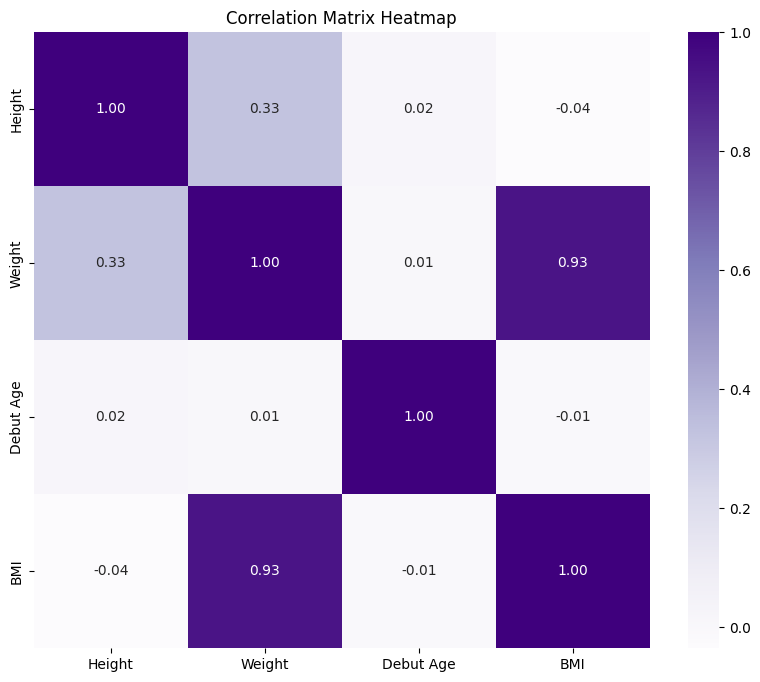

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
# Visualize relationships: I did pair plot for select features
selected_features = ['Debut Age', 'Height', 'Weight', 'BMI']
kpop_data[selected_features] = kpop_data[selected_features].apply(pd.to_numeric, errors='coerce')
cleaned_data_for_plot = kpop_data[selected_features].dropna()


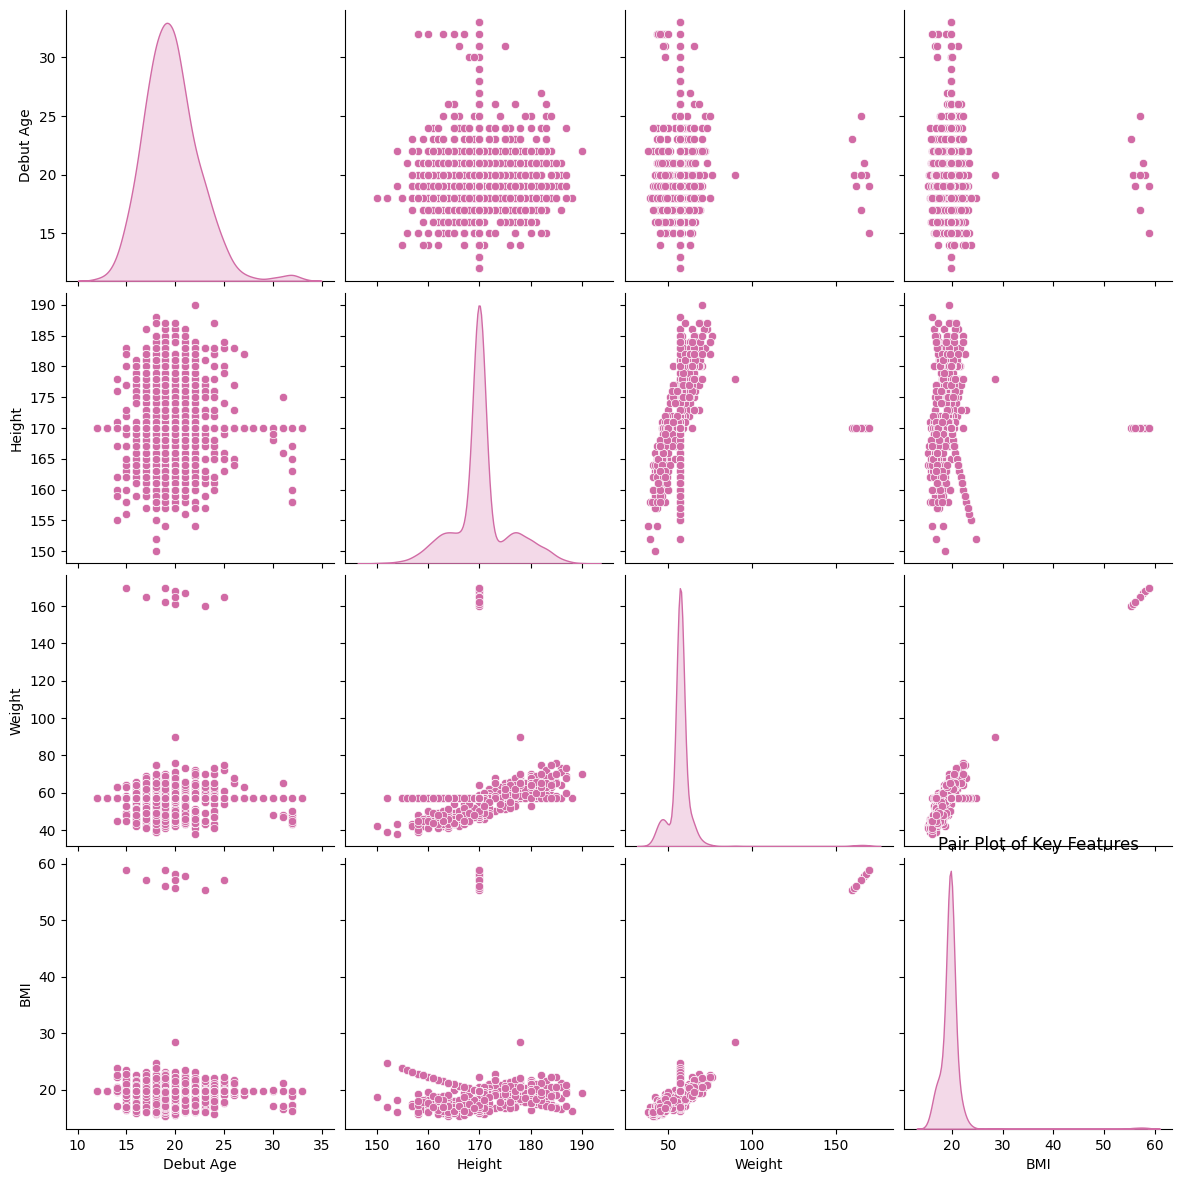

In [ ]:
sns.pairplot(cleaned_data_for_plot, diag_kind='kde', height=3)
plt.title("Pair Plot of Key Features")
plt.show()

In [14]:
kpop_data.describe()

,Date of Birth,Debut,Height,Weight,Debut Age,BMI
count,1588,1588,1588.000000,1588.000000,1588.0,1588.000000
mean,1997-09-20 06:38:59.546599552,2017-05-08 19:58:47.455919360,170.409320,57.216625,19.629723,19.690949
min,1979-02-16 00:00:00,1998-03-24 00:00:00,150.000000,38.000000,12.0,15.241690
25%,1994-08-19 06:00:00,2014-10-29 00:00:00,170.000000,57.000000,18.0,19.267171
50%,1998-02-21 12:00:00,2018-01-24 00:00:00,170.000000,57.000000,19.0,19.723183
75%,2001-03-09 00:00:00,2020-09-23 00:00:00,170.000000,57.000000,21.0,19.723183
max,2008-11-02 00:00:00,2023-04-11 00:00:00,190.000000,170.000000,33.0,58.823529
std,NaN,NaN,5.394105,9.896868,2.86586,3.252749


## **Exploratory Data Analysis (EDA): Commentary on Findings**


### **Summary Statistics**
1. **Debut Age**:
   - The average debut age for idols is approximately **19.63 years**, with a minimum of **12 years** and a maximum of **33 years**.
   - The majority of idols debut between **18 and 21 years**, as indicated by the interquartile range (IQR). This aligns with industry norms that favor younger individuals for longer career potential.

2. **Height**:
   - The average height of idols is **170.4 cm**, ranging from **150 cm** to **190 cm**.
   - With a standard deviation of **5.39 cm**, most idols’ heights are concentrated near the average, reflecting relatively consistent physical expectations within the industry.

3. **Weight**:
   - The average weight is **57.2 kg**, with a minimum of **38 kg** and a maximum of **170 kg**. 
   - Although there are a few extreme outliers, most idols appear to maintain weights close to the mean, highlighting potential norms for fitness or appearance.

4. **BMI (Body Mass Index)**:
   - The average BMI is **19.69**, with a range from **15.24** to **58.82**.
   - The lower range suggests that many idols are in the underweight category according to standard BMI classifications, which may reflect the industry's emphasis on slim appearances.
   - Outliers with higher BMIs may indicate unique cases or data anomalies, but overall, the industry seems to maintain idols with lean physiques.
---

### **Correlation Matrix Insights**
1. **Height and Weight**:
   - A moderate positive correlation (**0.68**) is observed, meaning that taller idols generally weigh more. This is expected due to the natural relationship between height and body weight.

2. **Debut Age**:
   - Correlations between debut age and physical attributes are notably weak:
     - **Debut Age and Height**: **0.02**
     - **Debut Age and Weight**: **0.01**
   - These findings suggest that physical characteristics have little to no influence on the age at which an idol debuts.

3. **BMI**:
   - **BMI and Weight**: Strong positive correlation (**0.93**) indicates that BMI is heavily influenced by weight, as expected from its formula.
   - **BMI and Height**: Weak negative correlation (**-0.04**) suggests height plays a smaller role in determining BMI.

---

### **Observations from the Pair Plot**
1. **Debut Age Distribution**:
   - The density plot reveals that most idols debut between **15 and 25 years**, with a prominent peak around **19 years**. This supports the notion that debuting during late teenage years or early adulthood is a common practice.

2. **Height vs. Weight**:
   - The scatter plot shows a clear positive relationship, affirming the moderate correlation seen in the matrix. Taller idols tend to weigh more, but the range still reflects the relatively slim expectations in the industry.

3. **Debut Age vs. Physical Attributes**:
   - The scatter plots for debut age against height and weight do not reveal significant patterns, reinforcing the weak correlations observed earlier.

4. **BMI Distribution**:
   - The majority of idols fall into the "underweight" or "normal" BMI categories, highlighting industry trends that favor lean physiques.

---

### **Conclusions and Key Takeaways**
- The K-pop industry seems to consistently debut idols around **19 years of age**, with little variation based on physical attributes like height or weight.
- Physical attributes such as BMI, height, and weight are proportionally correlated, but they do not influence the timing of an idol’s debut.
- The emphasis on lean physiques is evident from the BMI distribution, suggesting that appearance-related factors play a significant role in the industry.

### **Future Directions**
- To further understand debut age trends, incorporating additional variables (e.g., company practices, group dynamics) could provide a deeper perspective.
- Investigate whether BMI correlates with role-specific expectations (e.g., main dancer vs. visual roles).
- Exploring potential outliers in height and weight could reveal niche trends or unique exceptions in the industry.

# **Step 4: Comprehensive Analysis and Visualization**

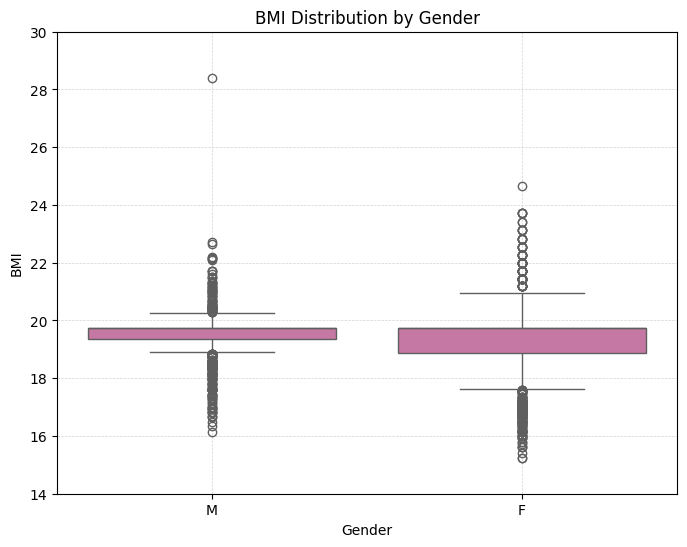

In [15]:
# Visualization of BMI trends by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x=kpop_data['Gender'], y=kpop_data['BMI'])
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.ylim(14, 30)  # Set y-axis limits to focus on meaningful BMI range
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

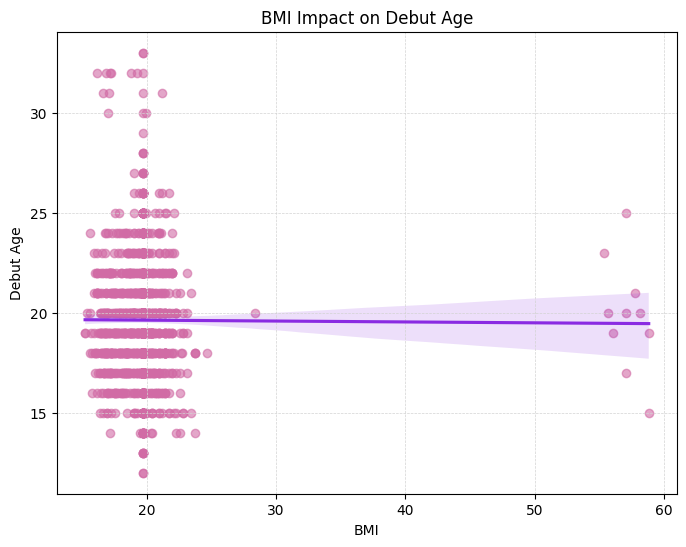

In [ ]:
# Scatter plot of BMI vs. debut age with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=kpop_data['BMI'], y=kpop_data['Debut Age'], 
            scatter_kws={'alpha':0.6, 'color':'#D16BA5'}, line_kws={'color':'#8A2BE2'})
plt.title('BMI Impact on Debut Age')
plt.xlabel('BMI')
plt.ylabel('Debut Age')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

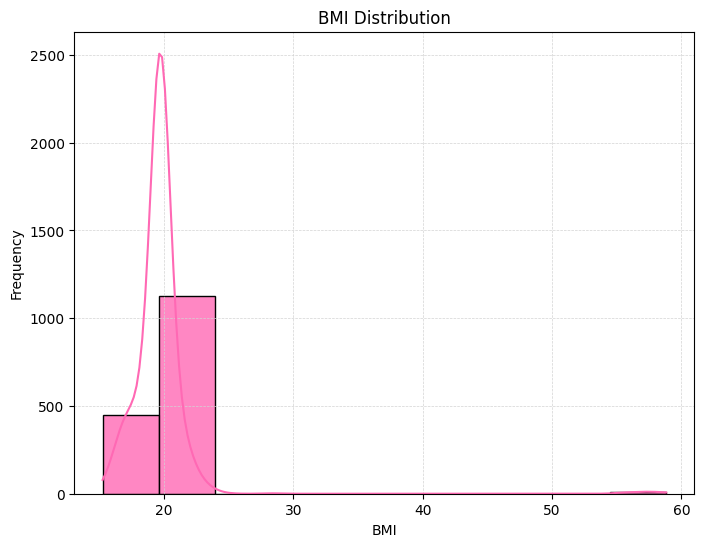

In [17]:
# Histogram of BMI
plt.figure(figsize=(8, 6))
sns.histplot(kpop_data['BMI'], bins=10, kde=True, color='#FF69B4', alpha=0.8)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

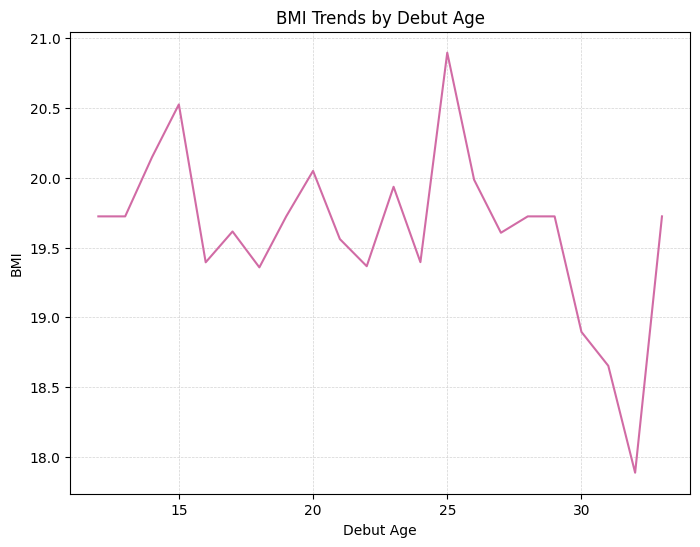

In [18]:
# Line plot for BMI trends 
plt.figure(figsize=(8, 6))
sns.lineplot(data=kpop_data.sort_values('Debut Age'), x='Debut Age', y='BMI', errorbar=None, color='#D16BA5')
plt.title('BMI Trends by Debut Age')
plt.xlabel('Debut Age')
plt.ylabel('BMI')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

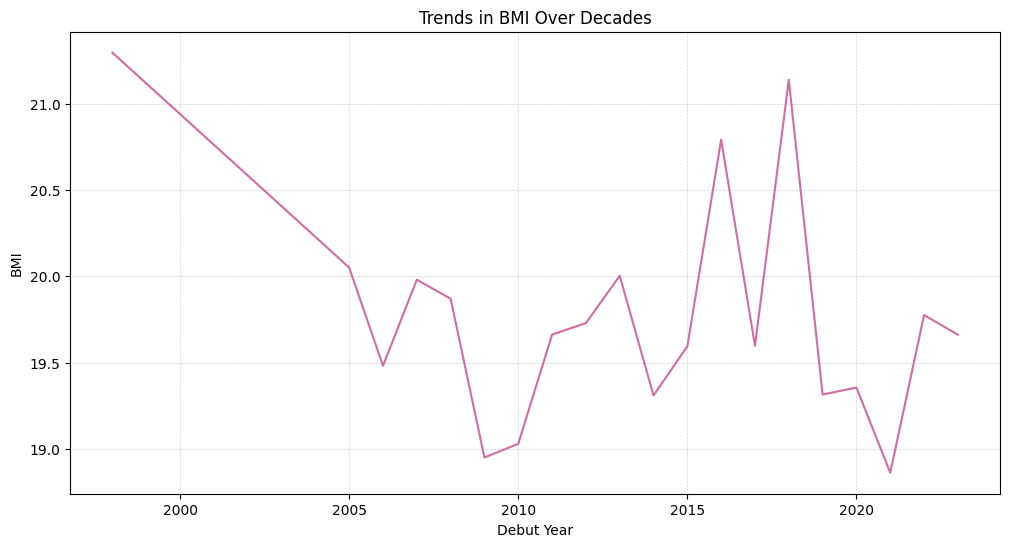

In [19]:

# Line plot for BMI trends over the decades
kpop_data['Debut Year'] = pd.to_datetime(kpop_data['Debut']).dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpop_data, x='Debut Year', y='BMI', errorbar=None, color='#D16BA5')
plt.title('Trends in BMI Over Decades')
plt.xlabel('Debut Year')
plt.ylabel('BMI')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

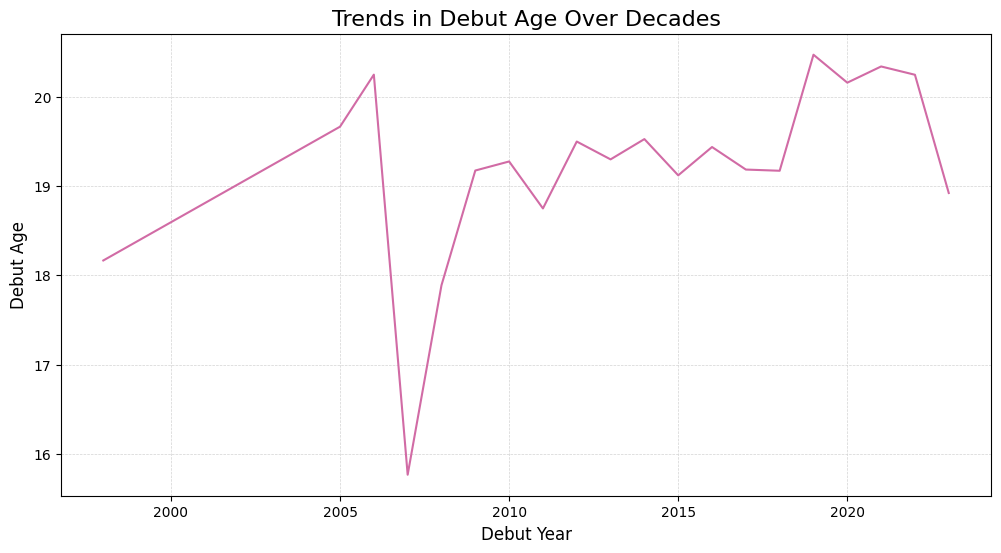

In [20]:
# Line plot for debut age trends over the decades
kpop_data['Debut Year'] = pd.to_datetime(kpop_data['Debut']).dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpop_data, x='Debut Year', y='Debut Age', errorbar=None, color='#D16BA5')
plt.title('Trends in Debut Age Over Decades', fontsize=16)
plt.xlabel('Debut Year', fontsize=12)
plt.ylabel('Debut Age', fontsize=12)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

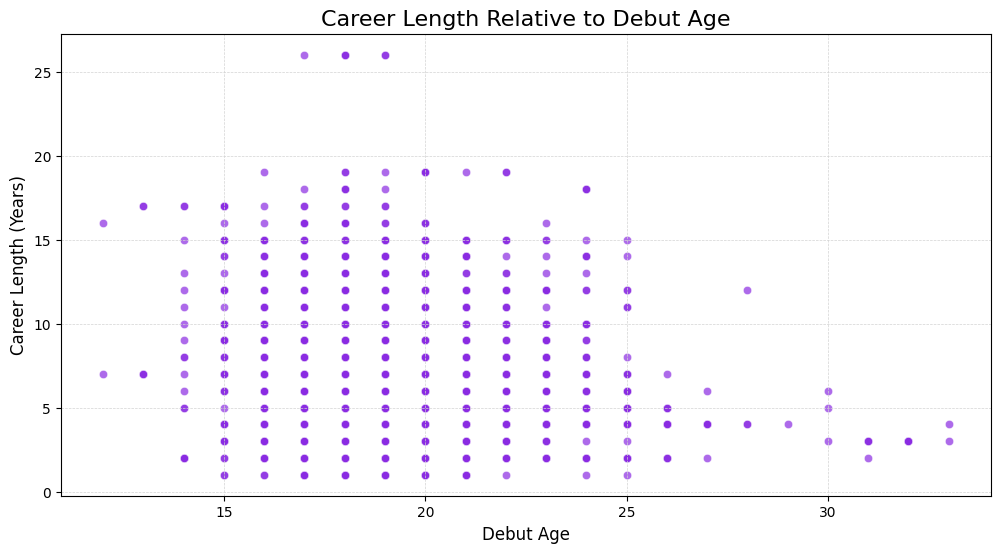

In [21]:
# Career Longevity Relative to Debut Age
kpop_data['Current Year'] = pd.Timestamp.now().year
kpop_data['Career Length'] = kpop_data['Current Year'] - kpop_data['Debut Year']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Debut Age', y='Career Length', data=kpop_data, alpha=0.7, color='#8A2BE2')
plt.title('Career Length Relative to Debut Age', fontsize=16)
plt.xlabel('Debut Age', fontsize=12)
plt.ylabel('Career Length (Years)', fontsize=12)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

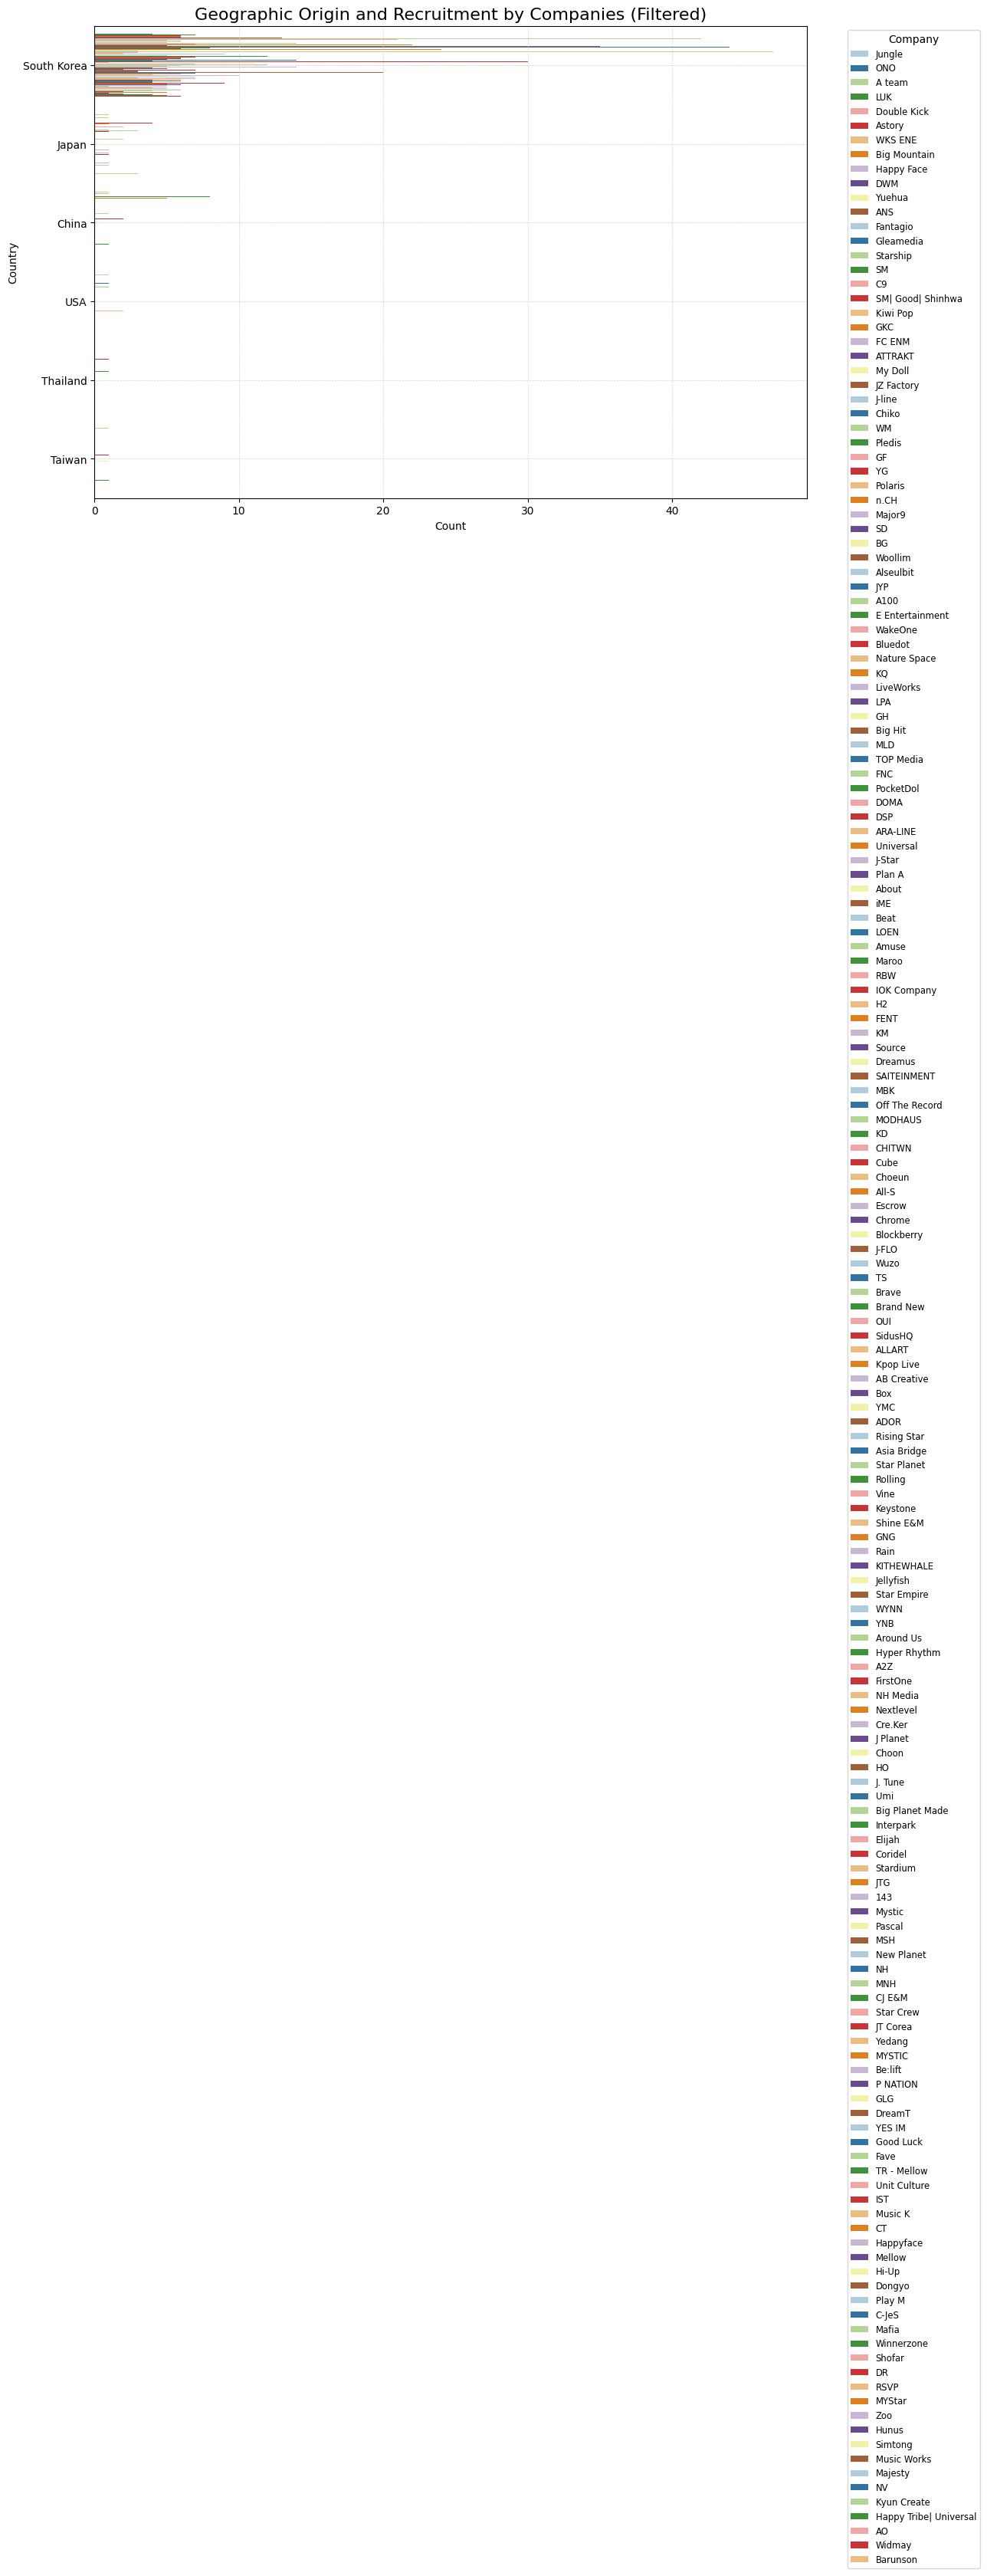

In [22]:
# Geographic Origin and Companies
# Simplify the graph by filtering to only include countries with significant representation
# Filter countries with more than a certain threshold of idols
country_counts = kpop_data['Country'].value_counts()
significant_countries = country_counts[country_counts > 5].index  # Adjust threshold as needed

# Filter the dataset to only include significant countries
filtered_data = kpop_data[kpop_data['Country'].isin(significant_countries)]

# Redraw the graph with the filtered data
plt.figure(figsize=(12, 8))
sns.countplot(y=filtered_data['Country'], hue=filtered_data['Company'], palette="Paired", order=filtered_data['Country'].value_counts().index)
plt.title('Geographic Origin and Recruitment by Companies (Filtered)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

# **Step 5: Build a Linear Regression Model**

In [23]:
# Define target (dependent variable) and predictors (independent variables)
target = 'Debut Age'
predictors = ['Height', 'Weight', 'BMI', 'Debut Year']

# Get rid of any rows with missing values in target or predictors
linear_data = kpop_data.dropna(subset=[target] + predictors)

# Split the dataset into training and testing sets
X = linear_data[predictors]
y = linear_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics
evaluation_metrics = {
    "R-squared (R²)": r2,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse
}

evaluation_metrics


{'R-squared (R²)': 0.05107383006038635,
 'Mean Squared Error (MSE)': 8.077189292722023,
 'Root Mean Squared Error (RMSE)': 2.842039636022345}

## **Evaluation of the Linear Regression Model**

### **Model Performance**
1. **R-squared (R²)**:
   - The R² value is **0.051**, meaning that only **5.1%** of the variation in the target variable (**Debut Age**) is explained by the predictors (**Height**, **Weight**, and **BMI**).
   - This indicates that the model is not capturing key factors influencing debut age, as physical attributes seem to have minimal impact.

2. **Mean Squared Error (MSE)**:
   - The MSE is **8.08**, representing the average squared difference between the predicted and actual debut ages.
   - While it’s a useful metric for comparison, it doesn’t give an intuitive sense of the error magnitude.

3. **Root Mean Squared Error (RMSE)**:
   - The RMSE is **2.84**, which translates to an average prediction error of about **2.84 years**.
   - This is relatively large, considering typical debut ages fall within the range of **12–33 years**.

---

### **Key Observations**
- The very low R² value suggests that the predictors chosen (**Height**, **Weight**, and **BMI**) are not strongly related to debut age. This makes sense since debut age is likely influenced by non-physical factors such as **company strategies** or **cultural trends**.
- Although the model makes predictions, they lack accuracy due to the weak relationships between the predictors and the target.



# **Step 6: Conclusion**

### 1. Key Findings and Insights

1. Debut Age Variability Across Companies:
   - The differences in debut age across companies are really fascinating. Boxplots revealed that bigger, well-known companies like SM, YG, and JYP tend to debut younger idols. This makes sense since younger idols have more time to grow their careers, and these companies probably have the resources to invest in long-term talent development. 
   - On the flip side, smaller or niche companies show a much wider spread in debut ages. This might be because they’re taking risks or trying out different strategies to stand out in a very competitive industry.

2. Trends in Debut Age Over Decades:
   - Looking at debut ages over time, there’s a clear rise during earlier decades, but things have leveled out more recently. This could mean companies are finding a “sweet spot” between debuting younger idols with potential for longer careers and older idols who might be more prepared to handle the demands of the industry.

3. Trends in BMI Over Decades:
   - The trends in BMI were a bit unexpected! There’s been a decline in average BMI over earlier years, and then it fluctuates in more recent years. This suggests that industry standards for physical appearance have changed, possibly reflecting different beauty trends or societal preferences during these times.

4. Career Length Relative to Debut Age:
   - It’s clear from the scatterplot that idols who debut younger tend to have longer careers. But it’s not always straightforward—there are exceptions where older debutants still achieve decent career lengths. This shows that while age is a factor, things like individual talent, company support, or even luck can influence how long someone stays in the industry.

5. Relationship Between Physical Attributes and Group Roles:
   - Surprisingly, physical attributes like height and weight don’t seem to have a strong correlation with roles like leader, dancer, or visual. This suggests that while appearance might play a role in overall selection, it’s talent, personality, and group dynamics that really drive role assignments.

6. Geographic Origin and Recruitment by Companies:
   - Not surprisingly, South Korea is the biggest source of idols, but it’s cool to see that global recruitment is growing. Larger companies like SM and YG are clearly focusing on recruiting talent from places like Japan, China, and the U.S., which shows their effort to appeal to a wider audience. Meanwhile, smaller companies seem to stick mostly to local talent, which could be due to limited resources or focusing on domestic appeal.

7. BMI and Gender Distribution:
   - The BMI distribution shows pretty strict standards for both genders. Males have slightly higher BMIs on average, but overall, the expectations for appearance are consistent across the board. This highlights how important physical appearance remains in the industry, even though there’s a bit of room for variation.

---

### 2. Implications of Results

- Recruitment and Longevity:
   - Younger debut ages being linked to longer careers makes a lot of sense when you think about how demanding and competitive the industry is. Companies are clearly betting on young talent to ensure they can build their careers over time.

- Evolving Physical Standards:
   - The trends in BMI show how much these standards have shifted over the years. While strict expectations remain, it’s encouraging to see that the industry adapts to broader societal trends and isn’t entirely stuck in one mold.

- Globalization:
   - Seeing more idols from international markets highlights how the K-pop industry is expanding its influence. This globalization not only increases its appeal but also shows the power of cultural exchange in entertainment.

- Role Assignments:
   - The weak link between physical traits and group roles is interesting. It suggests that while looks matter, companies seem to prioritize talent, chemistry, and what each member brings to the group as a whole.

---

### 3. Limitations and Challenges

- Data Completeness:
   - One of the biggest challenges was working with incomplete data. For example, not having specific details about group roles made it tough to fully explore some questions.

- Low Model Performance:
   - The regression analysis showed a low R², which was a bit disappointing. It likely means that there are other important factors—like training duration, individual talent, or company strategies—that we couldn’t measure with this dataset.

- Outliers and Representation:
   - Some outliers, like unusually high BMIs or career lengths, made the analysis tricky. Also, the overrepresentation of idols from major companies and South Korea might mean the results aren’t fully reflective of the industry’s diversity.

---

### 4. Concluding Statement

Overall, this project was a great opportunity to dive into the trends and dynamics of the K-pop industry. From understanding recruitment strategies to exploring how globalization and physical standards are shaping the industry, there’s so much to unpack. While there were some limitations with the dataset, the findings provide a solid foundation for future research. For example, adding more variables like training years or role-specific details could give an even deeper look into what drives success in K-pop. And beyond K-pop, these insights could be applied to other performance-driven fields like sports, acting, or fashion. This project really shows how data analysis can help make sense of complex industries!
